In [4]:
import numpy as np
import matplotlib.pyplot as plt
import theano
from theano import tensor as T

Using gpu device 0: GeForce 940MX (CNMeM is enabled with initial size: 80.0% of memory, cuDNN not available)


Dataset building

In [34]:
train_x = np.asarray([0, 1.0, 1.7, 2.0, 2.3, 3.0, 4.0])
train_y = np.asarray([3.0, 5.0, 8.0, 6.8, 11.0, 14.0, 12.0])

In [48]:
# Variables definition

X = T.vector('X')
w = theano.shared(np.random.randn(),
                 name='w')
b = theano.shared(np.random.randn(),
                 name='b')
y = T.vector('y')

In [49]:
# Number of samples is equivalent to the number of rows in the dataset
num_samples = train_x.shape[0]

# Define the prediction function
prediction = T.dot(X,w)+b
# Define the loss function
cost = T.sum(T.pow(prediction-y,2))/(2*num_samples)


training_rate = 0.01
grad_w = T.grad(cost, w)
grad_b = T.grad(cost, b)
updates = [(w, w - training_rate * grad_w),
          (b, b - training_rate * grad_b)]

In [50]:
train_model = theano.function(inputs=[X, y],
                             outputs=cost,
                              updates=updates,
                              allow_input_downcast=True
                             )

In [51]:
for i in range(50):
    print('cost', train_model(train_x, train_y))

cost 29.811613816670167
cost 26.405338091281823
cost 23.40950229969068
cost 20.77463254032657
cost 18.457218515472615
cost 16.41899467568552
cost 14.626308015403401
cost 13.049562074766305
cost 11.662727961717133
cost 10.442914315726888
cost 9.369989108293412
cost 8.426247031784632
cost 7.596116981386062
cost 6.865904797310928
cost 6.223567016984447
cost 5.6585118992455055
cost 5.161424433183928
cost 4.724112440494264
cost 4.339371228723639
cost 4.000864559280349
cost 3.703019963614218
cost 3.4409366780334336
cost 3.2103046761015355
cost 3.0073334609070113
cost 2.828689440745953
cost 2.6714408535691025
cost 2.533009330261733
cost 2.411127296508339
cost 2.3038005094563987
cost 2.2092751102281247
cost 2.1260086479377818
cost 2.052644596487435
cost 1.9879899431199712
cost 1.9309954784583703
cost 1.880738462392764
cost 1.8364073794295206
cost 1.7972885316376086
cost 1.762754247687403
cost 1.732252513177406
cost 1.7052978509261636
cost 1.681463300558002
cost 1.660373364873171
cost 1.6416978

In [52]:
w.get_value()

array(3.1239923326095704)

In [53]:
b.get_value()

array(1.7213965314445951)

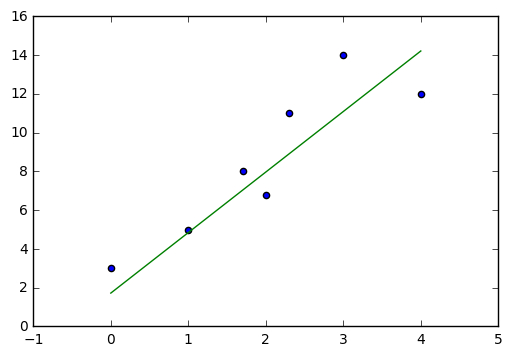

In [56]:
dot = theano.function([X], T.dot(X, w) + b, allow_input_downcast=True)

plt.scatter(train_x, train_y)
plt.plot(train_x, [x for x in dot(train_x)], 'g')
plt.show()